In [1]:
#Mount your drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Code
 Implement RBF networks from scratch (no specialized library like sklearn) using the help of ChatGPT. We will not provide the prompts for you this time.

 You are given two datasets:

 *    **'circle in the square'**
 contains two training data sets: *cis_train1.txt* and *cis_train2.txt* (they have different number of samples.) We provide you with one test set: *cis_test.txt*. Apply the RBF network with different parameters (at least three different number of basis functions, and different means and variances) and report the accuracy. Plot the original dataset and the predictions.

 *   **'function approximation'**
 contains two training data sets: *fa_train1.txt* and *fa_train2.txt* (they have different number of samples.) We provided one test set: 'fa_test.txt'. Apply the RBF network with different parameters (at least three different number of basis functions, and different means and variances) and report the MSE. Plot the original dataset and the predictions.

---

**Show all your code below.**

In [2]:
#code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def load_data(file_path):
    data = np.loadtxt(file_path,delimiter="\t")
    X = data[:, :-1]
    y = data[:, -1]
    return X, y


Center RBFN

Using RBF using euclidean distance

In [4]:
def plot_data_and_predictions(X, y, predictions, title):
    plt.scatter(X[:,0], X[:,1], y, label='Original Data')
    plt.scatter(X[:,0], X[:,1], predictions, label='RBF Predictions', color='r', marker='x')
    plt.title(title)
    plt.legend()
    plt.show()

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def radial_basis_function(x, mu, sigma):
    return np.exp(-np.linalg.norm(x - mu)**2 / (2 * sigma**2))

def design_matrix(X, centers, sigma):
    return np.array([[radial_basis_function(x, mu, sigma) for mu in centers] for x in X])

def train_rbf(X, y, num_centers, sigma):

    centers_idx = np.random.choice(len(X), size=num_centers, replace=False)
    centers = X[centers_idx]

    Phi = design_matrix(X, centers, sigma)

    # Solve for weights using pseudo-inverse
    weights = np.linalg.pinv(Phi) @ y

    return weights, centers

def predict_rbf(X, weights, centers, sigma):
    Phi = design_matrix(X, centers, sigma)
    return Phi @ weights

def calculate_accuracy(predictions, targets):
    return np.mean(np.round(predictions) == targets)

In [6]:
X_train, y_train = load_data("/content/drive/MyDrive/Colab Notebooks/ML/RBFN_datasets/cis_train1.txt")
X_test, y_test = test = load_data("/content/drive/MyDrive/Colab Notebooks/ML/RBFN_datasets/cis_test.txt")


num_centers_list = [5, 10, 15]
sigma_list = [0.1, 0.5, 1.0]


for num_centers in num_centers_list:
    for sigma in sigma_list:

        weights, centers = train_rbf(X_train, y_train, num_centers, sigma)


        predictions = predict_rbf(X_test, weights, centers, sigma)


        accuracy = calculate_accuracy(predictions, y_test)
        print(f"Accuracy for {num_centers} centers and sigma {sigma}: {accuracy:.2f}")


        plot_data_and_predictions(X_test, y_test, predictions, f'RBF Predictions - {num_centers} centers, sigma {sigma}')


Output hidden; open in https://colab.research.google.com to view.

In [7]:

X_train, y_train = load_data("/content/drive/MyDrive/Colab Notebooks/ML/RBFN_datasets/cis_train2.txt")
X_test, y_test = test = load_data("/content/drive/MyDrive/Colab Notebooks/ML/RBFN_datasets/cis_test.txt")


num_centers_list = [5, 10, 15]
sigma_list = [0.1, 0.5, 1.0]


for num_centers in num_centers_list:
    for sigma in sigma_list:

        weights, centers = train_rbf(X_train, y_train, num_centers, sigma)

        predictions = predict_rbf(X_test, weights, centers, sigma)


        accuracy = calculate_accuracy(predictions, y_test)
        print(f"Accuracy for {num_centers} centers and sigma {sigma}: {accuracy:.2f}")


        plot_data_and_predictions(X_test, y_test, predictions, f'RBF Predictions - {num_centers} centers, sigma {sigma}')


Output hidden; open in https://colab.research.google.com to view.

Center RBF neural network

Using RBF Kernel to see it works

In [8]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

class RBFNetwork:
    def __init__(self, num_basis_functions, input_dim, output_dim=1):
        self.num_basis_functions = num_basis_functions
        self.input_dim = input_dim
        self.output_dim = output_dim


        self.centers = np.random.rand(num_basis_functions, input_dim)
        self.variances = np.random.rand(num_basis_functions)
        self.weights = np.random.rand(num_basis_functions, output_dim)

    def rbf_kernel(self, x, center, variance):
        return np.exp(-np.sum((x - center)**2) / (2 * variance**2))

    def rbf_activations(self, x):
        return np.array([self.rbf_kernel(x, c, v) for c, v in zip(self.centers, self.variances)])

    def predict(self, x):

        rbf_activations = self.rbf_activations(x)


        output = np.dot(rbf_activations, self.weights.flatten())
        return output

    def train(self, X, y, learning_rate=0.01, epochs=1000):
        for epoch in range(epochs):
            for i in range(len(X)):

                x = X[i]
                y_pred = self.predict(x)


                error = y[i] - y_pred


                self.weights += learning_rate * error * self.rbf_activations(x)[:, np.newaxis]

    def evaluate(self, X, y_true):
        y_pred = np.array([self.predict(x) for x in X])
        y_pred_binary = np.where(y_pred > 0.5, 1, 0)
        accuracy = accuracy_score(y_true, y_pred_binary)
        return accuracy

Number of basis functions: 5, Accuracy: 0.9394


/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


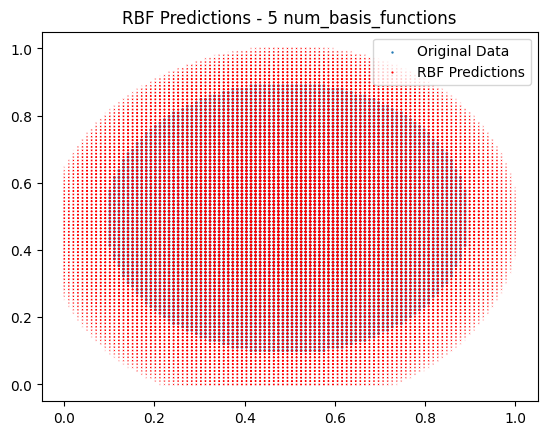

Number of basis functions: 10, Accuracy: 0.9166


/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


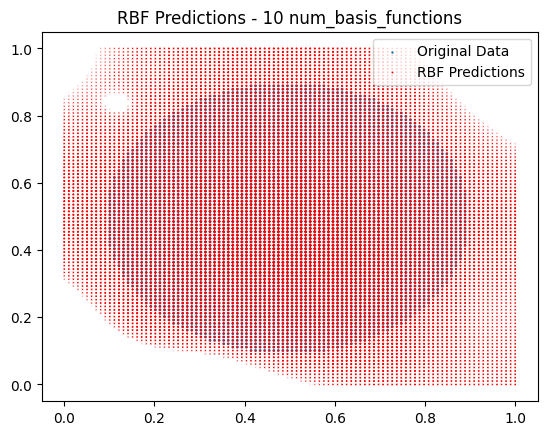

Number of basis functions: 15, Accuracy: 0.9297


/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


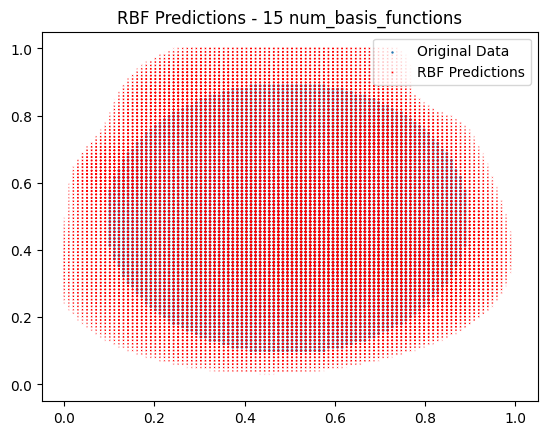

In [9]:
X_train, Y_train = load_data("/content/drive/MyDrive/Colab Notebooks/ML/RBFN_datasets/cis_train1.txt")
X_test, Y_test = test = load_data("/content/drive/MyDrive/Colab Notebooks/ML/RBFN_datasets/cis_test.txt")



num_basis_functions_list = [5, 10, 15]

for num_basis_functions in num_basis_functions_list:
    rbf_net = RBFNetwork(num_basis_functions=num_basis_functions, input_dim=X_train.shape[1])
    rbf_net.train(X_train, Y_train)


    accuracy = rbf_net.evaluate(X_test, Y_test)

    predictions = np.array([rbf_net.predict(x) for x in X_test])

    print(f"Number of basis functions: {num_basis_functions}, Accuracy: {accuracy}")
    plot_data_and_predictions(X_test, Y_test, predictions, f'RBF Predictions - {num_basis_functions} num_basis_functions')

(1000, 2)
Number of basis functions: 5, Accuracy: 0.6754


/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


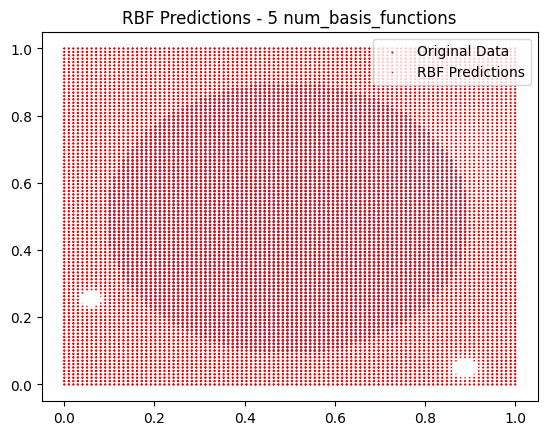

Number of basis functions: 10, Accuracy: 0.915


/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


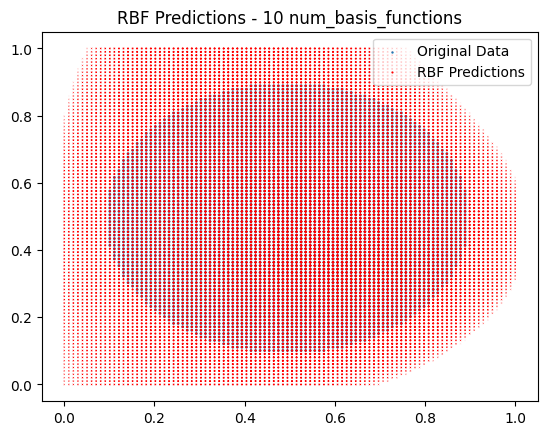

Number of basis functions: 15, Accuracy: 0.9406


/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


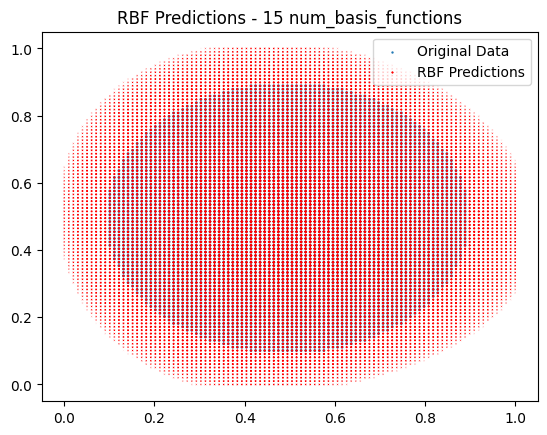

In [10]:
X_train, Y_train = load_data("/content/drive/MyDrive/Colab Notebooks/ML/RBFN_datasets/cis_train2.txt")
X_test, Y_test = test = load_data("/content/drive/MyDrive/Colab Notebooks/ML/RBFN_datasets/cis_test.txt")

print(X_train.shape)


num_basis_functions_list = [5, 10, 15]

for num_basis_functions in num_basis_functions_list:
    rbf_net = RBFNetwork(num_basis_functions=num_basis_functions, input_dim=X_train.shape[1])
    rbf_net.train(X_train, Y_train)


    accuracy = rbf_net.evaluate(X_test, Y_test)

    predictions = np.array([rbf_net.predict(x) for x in X_test])

    print(f"Number of basis functions: {num_basis_functions}, Accuracy: {accuracy}")
    plot_data_and_predictions(X_test, Y_test, predictions, f'RBF Predictions - {num_basis_functions} num_basis_functions')

Function Approximation

In [11]:
def load_data(file_path):
    data = np.loadtxt(file_path)
    X = data[:, :-1]
    y = data[:, -1]
    return X, y


In [12]:
def calculate_mse(predictions, targets):
    return np.mean((predictions - targets) ** 2)

In [13]:
def plot_results(X, y, predictions, title):
    plt.scatter(X, y, label='Original Data')
    plt.plot(X, predictions, color='red', label='RBF Predictions')
    plt.title(title)
    plt.legend()
    plt.show()

RBF Kernel Network

(20, 1)
Number of Basis Functions: 5, MSE: 0.02994166933787591


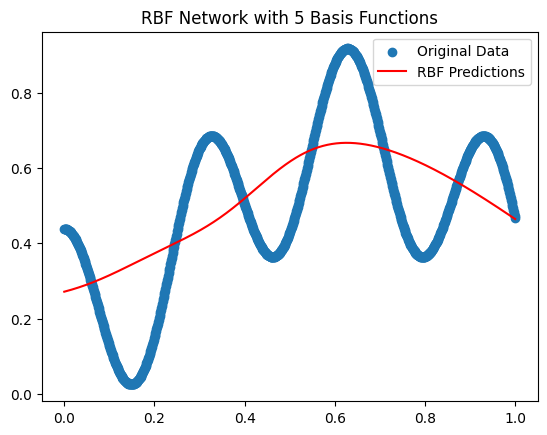

Number of Basis Functions: 10, MSE: 0.03113111412748829


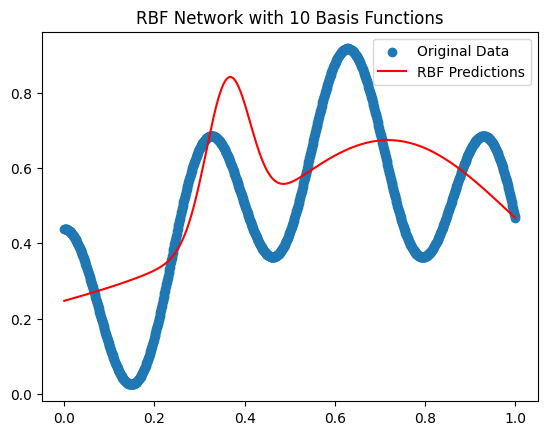

Number of Basis Functions: 15, MSE: 0.026086687831703436


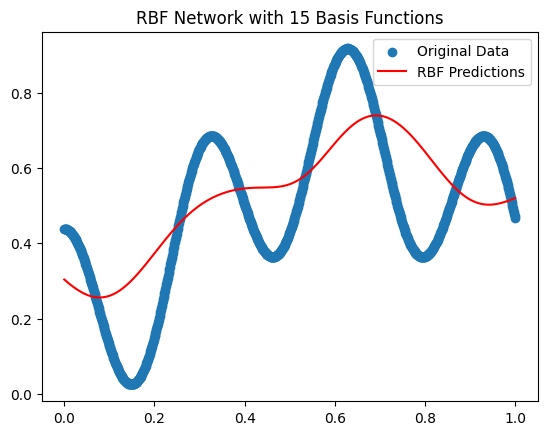

In [14]:
X_train, Y_train = load_data("/content/drive/MyDrive/Colab Notebooks/ML/RBFN_datasets/fa_train1.txt")
X_test, Y_test = test = load_data("/content/drive/MyDrive/Colab Notebooks/ML/RBFN_datasets/fa_test.txt")

print(X_train.shape)


num_basis_functions_list = [5, 10, 15]

for num_basis_functions in num_basis_functions_list:
    rbf_net = RBFNetwork(num_basis_functions=num_basis_functions, input_dim=X_train.shape[1])
    rbf_net.train(X_train, Y_train)

    predictions = np.array([rbf_net.predict(x) for x in X_test])

    mse = calculate_mse(predictions, Y_test)
    print(f"Number of Basis Functions: {num_basis_functions}, MSE: {mse}")


    plot_results(X_test, Y_test, predictions, f'RBF Network with {num_basis_functions} Basis Functions')

(100, 1)
Number of Basis Functions: 5, MSE: 0.028432678704823647


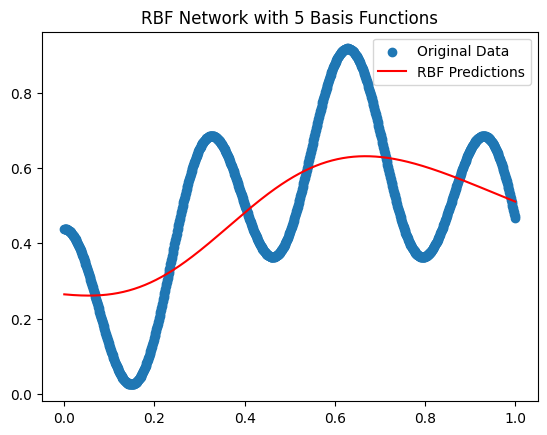

Number of Basis Functions: 10, MSE: 0.02540809128514064


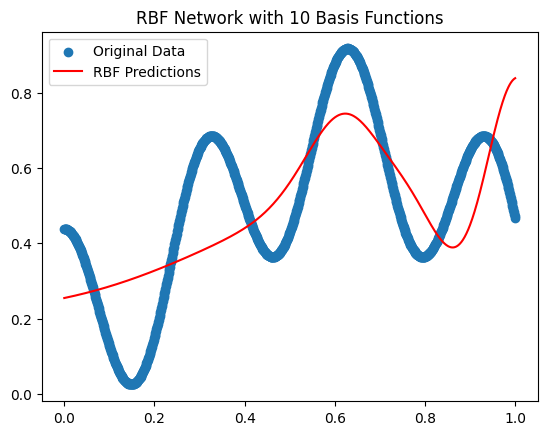

Number of Basis Functions: 15, MSE: 0.02398416910481348


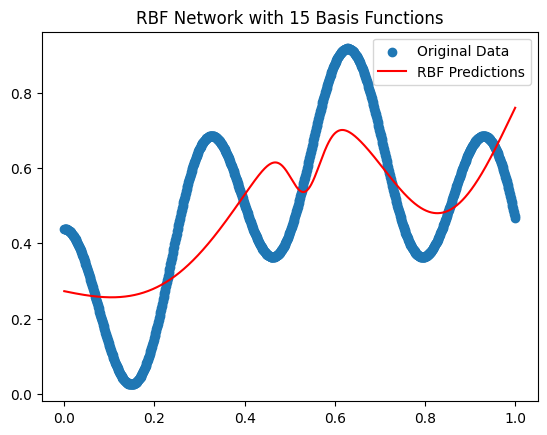

In [15]:
X_train, Y_train = load_data("/content/drive/MyDrive/Colab Notebooks/ML/RBFN_datasets/fa_train2.txt")
X_test, Y_test = test = load_data("/content/drive/MyDrive/Colab Notebooks/ML/RBFN_datasets/fa_test.txt")

print(X_train.shape)


num_basis_functions_list = [5, 10, 15]

for num_basis_functions in num_basis_functions_list:
    rbf_net = RBFNetwork(num_basis_functions=num_basis_functions, input_dim=X_train.shape[1])
    rbf_net.train(X_train, Y_train)



    predictions = np.array([rbf_net.predict(x) for x in X_test])

    mse = calculate_mse(predictions, Y_test)
    print(f"Number of Basis Functions: {num_basis_functions}, MSE: {mse}")


    plot_results(X_test, Y_test, predictions, f'RBF Network with {num_basis_functions} Basis Functions')

The previous code used random center and random variance. Use Kmean to choose appropriate center to improve the performance,

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def kmeans(X, k, max_iterations=100):
    centroids = X[np.random.choice(range(len(X)), k, replace=False)]

    for _ in range(max_iterations):
        distances = np.linalg.norm(X - centroids[:, np.newaxis], axis=2)
        labels = np.argmin(distances, axis=0)

        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])

        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return centroids

Finding Appropriate Variances

In [17]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

class RBFNetwork:
    def __init__(self, data, variances, num_basis_functions, input_dim, output_dim=1):

        self.num_basis_functions = num_basis_functions
        self.input_dim = input_dim
        self.output_dim = output_dim

        self.centers = kmeans(data, num_basis_functions)

        self.variances = variances

        self.weights = np.random.rand(num_basis_functions, output_dim)

    def rbf_kernel(self, x, center, variance):
        return np.exp(-np.sum((x - center)**2) / (2 * variance**2))

    def rbf_activations(self, x):
        return np.array([self.rbf_kernel(x, c, v) for c, v in zip(self.centers, self.variances)])

    def predict(self, x):

        rbf_activations = self.rbf_activations(x)


        output = np.dot(rbf_activations, self.weights.flatten())
        return output

    def train(self, X, y, learning_rate=0.01, epochs=1000):
        for epoch in range(epochs):
            for i in range(len(X)):

                x = X[i]
                y_pred = self.predict(x)


                error = y[i] - y_pred


                self.weights += learning_rate * error * self.rbf_activations(x)[:, np.newaxis]

    def evaluate(self, X, y_true):
        y_pred = np.array([self.predict(x) for x in X])
        y_pred_binary = np.where(y_pred > 0.5, 1, 0)
        accuracy = accuracy_score(y_true, y_pred_binary)
        return accuracy

(100, 1)
Variance: [0.05 0.05 0.05 0.05 0.05], MSE: 0.08117697334479197


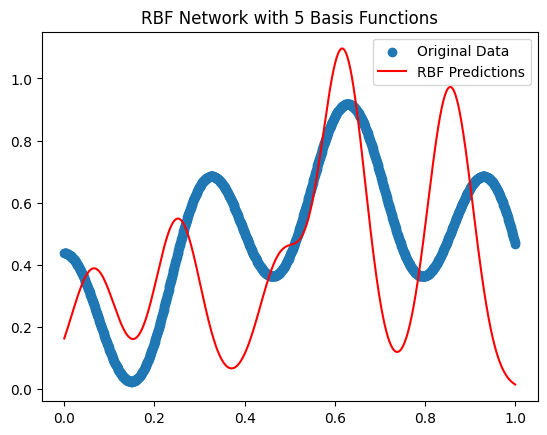

Variance: [0.1 0.1 0.1 0.1 0.1], MSE: 0.034261234380665466


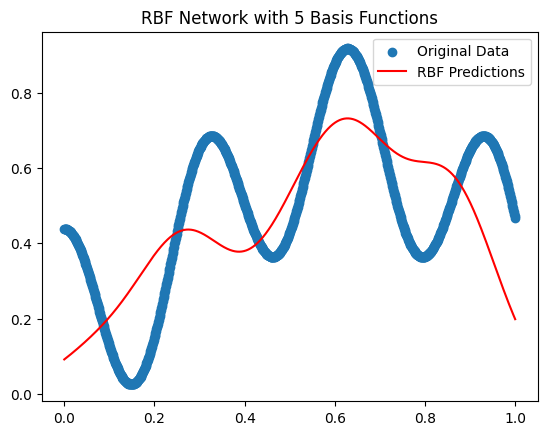

Variance: [0.5 0.5 0.5 0.5 0.5], MSE: 0.030078933336640898


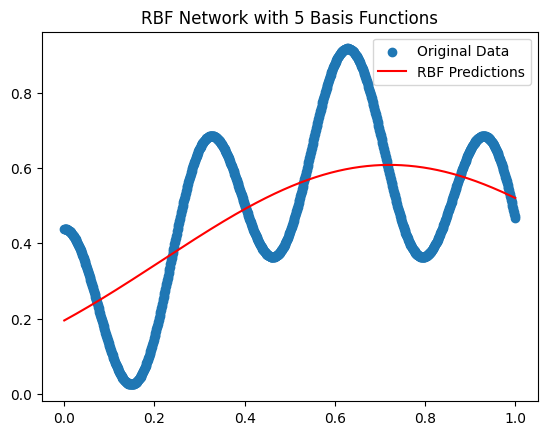

Variance: [1. 1. 1. 1. 1.], MSE: 0.03392481730848508


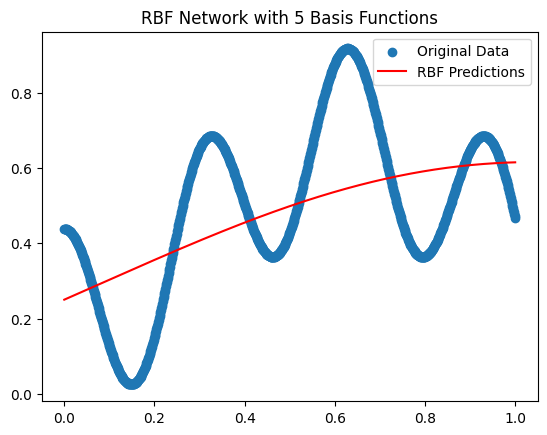

Variance: [0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05], MSE: 0.006767108756032542


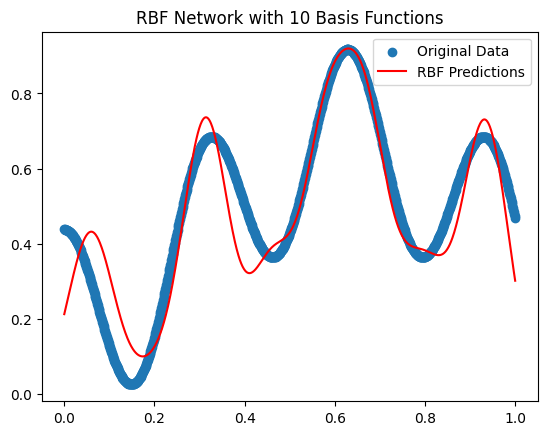

Variance: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1], MSE: 0.0010198266928337525


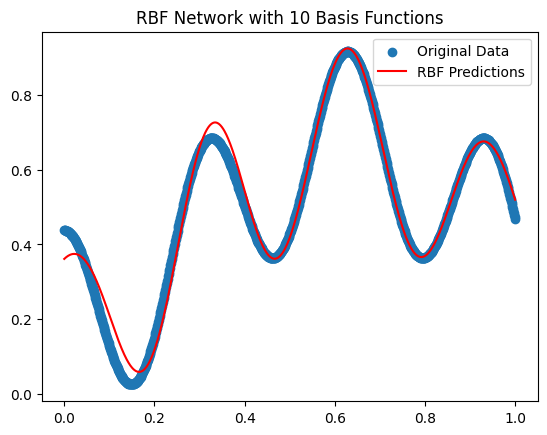

Variance: [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5], MSE: 0.030381303017426378


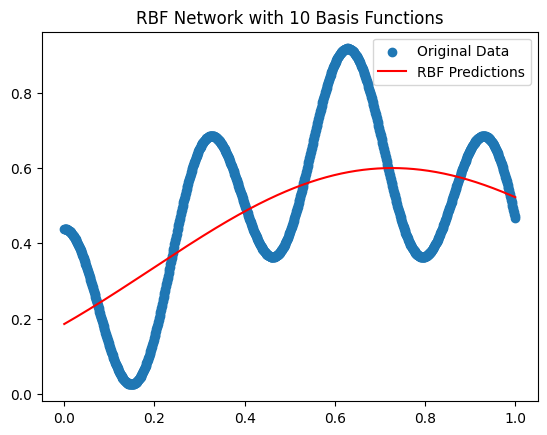

Variance: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.], MSE: 0.03515171686831528


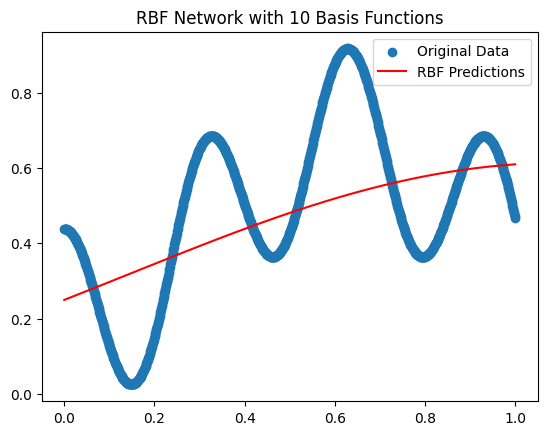

Variance: [0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05
 0.05], MSE: 0.0009175688730814276


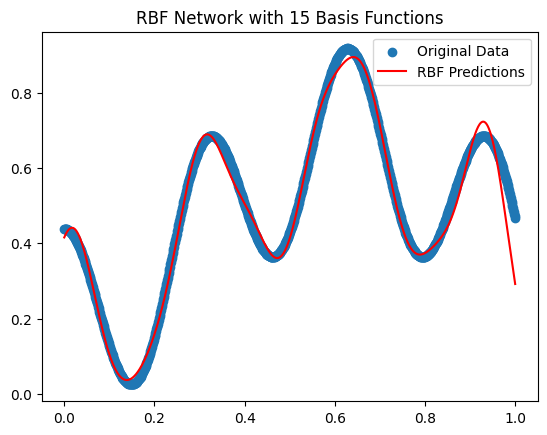

Variance: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1], MSE: 8.817598305656421e-05


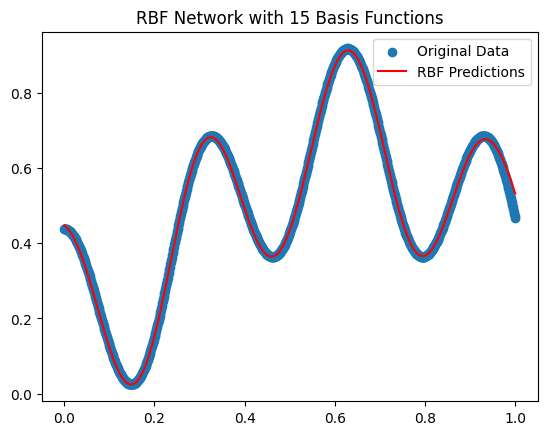

Variance: [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5], MSE: 0.03074421912980701


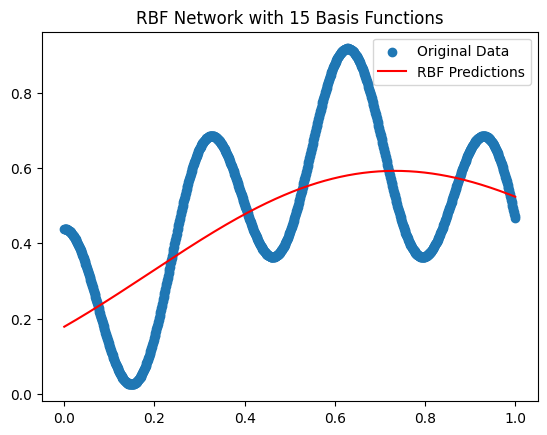

Variance: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.], MSE: 0.03506640336229692


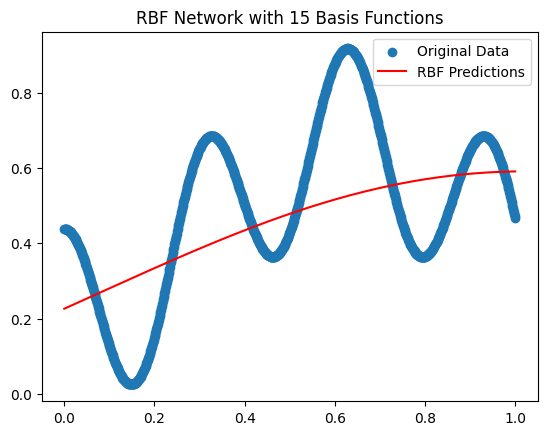

In [18]:
X_train, Y_train = load_data("/content/drive/MyDrive/Colab Notebooks/ML/RBFN_datasets/fa_train2.txt")
X_test, Y_test = test = load_data("/content/drive/MyDrive/Colab Notebooks/ML/RBFN_datasets/fa_test.txt")

print(X_train.shape)


variances_list = [0.05, 0.1, 0.5, 1.0]

num_basis_functions_list = [5, 10, 15]


for num_basis_functions in num_basis_functions_list:

  for variances in variances_list:

    variances = np.full(num_basis_functions, variances)

    rbf_net = RBFNetwork(X_train, variances, num_basis_functions=num_basis_functions, input_dim=X_train.shape[1])
    rbf_net.train(X_train, Y_train)

    predictions = np.array([rbf_net.predict(x) for x in X_test])

    mse = calculate_mse(predictions, Y_test)
    print(f"Variance: {variances}, MSE: {mse}")


    plot_results(X_test, Y_test, predictions, f'RBF Network with {num_basis_functions} Basis Functions')

# Report


1.   What were some challenges that you encountered while using ChatGPT to assist you in this task? (Name at least 2)
2.   Ask ChatGPT to analyse the advantages of using a larger dataset for the RBFN. Do you agree with ChatGPT's statement? Why yes or why not?
3.   Compare the results when you varied the parameters. Which configuration yield the best results for each task?
4.   Conclude with some thoughts and things you learned from this homework.

**What were some challenges that you encountered while using ChatGPT to assist you in this task? (Name at least 2)**<br>
Firstly, ChatGPT helps me with overall Python coding. I am not that familiar with Python coding, especially with the NumPy library or other libraries. Usually, I spent time looking for the existence of Python libraries that are implemented for required tasks. ChatGPT helped me to reduce the time for these tasks. However, ChatGPT sometimes makes mistakes that the developer would not probably make. Such as not closing the bracket if there are consecutive brackets. Or missing out on important keywords such as “self” for class-type coding. Secondly, in the case of incorrect ChatGPT code, if I give the wrong part and the error comes out in the prompt, ChatGPT does fix the code, but sometimes it changes irrelevant code parts. I also experienced that I provided the error-generating code and fixed it, but ChatGPT did not fix the code saying it was fixed with a “sincere” apology. I personally think using same chat to correct the code increase the probability of awkward fix. <br>
<br>
**Ask ChatGPT to analyse the advantages of using a larger dataset for the RBFN. Do you agree with ChatGPT's statement? Why yes or why not?**<br><br>
ChatGPT’s answer: A Radial Basis Function Network (RBFN) is a type of artificial neural network that uses radial basis functions as activation functions. The size and quality of the dataset used to train an RBFN can have a significant impact on its performance. Here are some advantages of using a larger dataset for training an RBFN:

    Improved Generalization:
        A larger dataset provides a more diverse and representative sample of the underlying data distribution. This helps the RBFN to generalize better to unseen data, reducing the risk of overfitting to specific patterns present in a smaller dataset.

    Increased Model Robustness:
        With a larger dataset, the RBFN is exposed to a wider range of input variations and noise, which can make the model more robust. It learns to capture the underlying patterns in the data while ignoring irrelevant fluctuations that might be present in a smaller dataset.

    Enhanced Feature Representation:
        Larger datasets allow the RBFN to learn more complex and nuanced representations of input features. This is particularly important when dealing with high-dimensional data or data with intricate relationships between variables.

    Reduced Sampling Bias:
        A larger dataset helps mitigate the impact of sampling bias by providing a more comprehensive view of the overall population. This is crucial for creating models that are representative of the broader data distribution and not biased toward specific subsets.

    Better Hyperparameter Tuning:
        Training an RBFN on a larger dataset allows for more effective hyperparameter tuning. With a diverse set of examples, it becomes easier to find the optimal configuration for parameters such as the number of radial basis functions, spread parameters, and weights.

    Increased Statistical Significance:
        Larger datasets provide a more statistically significant basis for training and evaluating the performance of the RBFN. This is particularly important in ensuring that any observed trends or patterns are not mere artifacts of a small sample size.

    Enhanced Learning of Rare Events:
        In situations where rare events or edge cases are essential, a larger dataset is more likely to include instances of these events. This enables the RBFN to better understand and learn to handle such occurrences.

    Facilitates Transfer Learning:
        A larger dataset can make it easier to apply transfer learning principles. Pre-training on a large dataset related to the problem at hand can provide a good starting point for fine-tuning the RBFN on a smaller, task-specific dataset.

It's important to note that while a larger dataset can offer these advantages, the quality of the data is equally crucial. Ensuring data cleanliness, relevance, and appropriate preprocessing steps are essential for maximizing the benefits of a larger dataset in training an RBFN or any other machine learning model.

**My Answer**: I think ChatGPT proposed valid reasons. RBF network is an artificial neural network that uses radial basis functions as activation functions. It is used for tasks such as function approximation, classification, and regression. [https://en.wikipedia.org/wiki/Radial_basis_function_network]. Since they are good at approximating complex relationships in the data, considering the network’s implementation, a larger dataset will increase the generalization and robustness. Reducing bias and the chance of overfitting is another advantage. Additionally, a larger dataset enables the RBFN to better handle rare events or edge cases, as it is more likely to encounter instances of such occurrences during training.
<br><br>
**Compare the results when you varied the parameters. Which configuration yields the best results for each task?**<br><br>
On the task of Center RBFN, using a bigger training set gave a higher overall performance. Also, using a higher number of basis functions increased the performance. From this perspective, using more centers helps to increase the performance. For the variance, the 0.5 or 1.0 standard deviation value achieved the highest performance. I designed to pick the center randomly and with many iterations, there was a difference in the accuracy due to this reason.<br>
On the function approximation, I first designed to use random variances and centers, but its prediction was not promising. Sometimes it predicted well, but most of the time not. Training with the larger dataset and higher number of basis functions was more promising. To improve the performance, I used K-means algorithms to select the center and tried with various std values. I could increase the performance. The one that achieved the highest performance was the model with 15 basis functions and 0.1 standard deviation. I could see the chosen center and variances affect the performance.
<br><br>
**Conclude with some thoughts and things you learned from this homework.**<br>
It was interesting to implement the RBF network. I could see what factors influence the model’s prediction performance. I got lots of help from the ChatGPT. ChatGPT gave me great insight into implementing overall architecture and provided helpful Python libraries and functionality. I think it worked as a search engine while I was doing this homework. Despite this, I could not ensure the provided info was promising, I needed to cross-check.
Also, Using learned algorithms to improve the performance of the network was one of the exciting things. Using K-means to select the center was a great idea.
